# NumPy Basics: Arrays and Vectorized Computation

## NumPy基礎：矩陣與向量計算

NumPy是高效能科學計算數據分析的基礎函式庫，也是本書所介紹所有的高級工具的建構基礎，其部分功能如下:

* ndarray 具有向量計算與複雜的廣播功能(?!)快速且節省空間的多維陣列
* 可對於整組數據做快速計算，不須迴圈
* 讀寫檔案，與操作記憶體內檔案的工具
* 線性代數 亂數 傅立葉轉換功能
* 用C、C++、fortran編寫的工具

In [1]:
#繪圖顯示在ipython之中
%matplotlib inline

In [2]:
#匯入套件
from __future__ import division
from numpy.random import randn
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## The NumPy ndarray: a multidimensional array object

### 多維度的陣列物件，物件內item必須為相同型態

In [4]:
#產生一個2x3的亂數陣列
data = randn(2, 3)
print(data)

[[ 1.4878  0.0488  0.4539]
 [ 0.0047 -0.4324 -0.9508]]


In [5]:
print(data * 10)
print(data + data)

[[ 14.8784   0.4876   4.5388]
 [  0.0469  -4.3242  -9.5077]]
[[ 2.9757  0.0975  0.9078]
 [ 0.0094 -0.8648 -1.9015]]


In [7]:
#顯示維度與型態
print(data.shape)
print(data.dtype)

(2, 3)
float64


### Creating ndarrays
#### 建立陣列物件

In [9]:
#建立一維陣列
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [11]:
#建立二維陣列
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
print(arr2)
print(arr2.ndim)
print(arr2.shape)

[[1 2 3 4]
 [5 6 7 8]]
2
(2, 4)


In [12]:
#會自動判斷最適合的型別
print(arr1.dtype)
print(arr2.dtype)

float64
int32


In [14]:
print('一維0矩陣')
print(np.zeros(10))
print('二維0矩陣')
print(np.zeros((3, 6)))
print('三維空矩陣')
print(np.empty((2, 3, 2)))

一維0矩陣
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
二維0矩陣
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
三維空矩陣
[[[  1.4005e-311   6.3660e-314]
  [  0.0000e+000   2.9644e-323]
  [  1.9098e-313   8.9334e+165]]

 [[  5.2660e-037   3.2255e-313]
  [  1.1167e+165   4.0318e-313]
  [  1.0414e-071   1.4213e+161]]]


In [18]:
print(np.arange(15))
print(np.arange(0, 10, 0.5))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5]


|函數名稱|說明|
|--|--|
|array|將輸入數據轉換成ndarray，預設值接複製輸入數字|
|asarray|將輸入數據轉換成ndarray，如果輸入本身就是ndarray就不進行複製|
|arange|類似內建的range，但是是ndarray物件不是list|
|ones|產生皆為1的陣列|
|zeros|產生皆為0的陣列|
|empty|產生空陣列|
|eye、identity|產生單元矩陣|

### Data Types for ndarrays
#### ndarray的數據類型

|類型|類型代碼|說明|
|--|--|--|
|int8, uint8|i1, u1|有正負和無正負的8位整數|
|int16, uint16|i2, u2|有正負和無正負的16位整數|
|int32, uint32|i4, u4|有正負和無正負的32位整數|
|int64, uint64|i8, u8|有正負和無正負的64位整數|
|float16|f2|半精度浮點數|
|float32|f4 or f|標準單精度浮點數|
|float64|f8 or d|標準雙精度浮點數|
|float128|f16 or g|擴展精度浮點數|
|complex64, complex128, complex256|c8, c16, c32|複數|
|bool|?|True與False|
|object|O|Python的物件|
|string\_|S|固定長度的字串，如S10表示10個字節的文字|
|unicode\_|U|固定長度的unicode類型，如U10表示10個字節的文字|


In [19]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


In [20]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
float_arr = arr.astype(np.float64)
print(float_arr.dtype)

int32
float64


In [23]:
#強迫轉換浮點數至整數，則小數部分捨去
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [24]:
#轉換文字至浮點數
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([  1.25,  -9.6 ,  42.  ])

In [25]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [26]:
#使用代碼宣告類型
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=uint32)

### Operations between arrays and scalars
#### 矩陣之間的運算

只要維度與大小相同的矩陣，任何運算皆會直接套用至每一個元素

In [4]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr)
print('平方')
print(arr * arr)
print('相減')
print(arr - arr)

[[ 1.  2.  3.]
 [ 4.  5.  6.]]
平方
[[  1.   4.   9.]
 [ 16.  25.  36.]]
相減
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [5]:
print('倒數')
print(1 / arr)
print('開根號')
print(arr ** 0.5)

倒數
[[ 1.      0.5     0.3333]
 [ 0.25    0.2     0.1667]]
開根號
[[ 1.      1.4142  1.7321]
 [ 2.      2.2361  2.4495]]


### Basic indexing and slicing
#### 矩陣索引與拆解

In [10]:
arr = np.arange(10)
print(arr)
print(arr[5])
print(arr[5:8])

# 廣播用法，範圍內皆取代
arr[5:8] = 12
print(arr)

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


In [11]:
#傳址，原始數據會受影響
arr_slice = arr[5:8]
arr_slice[1] = 12345
print(arr)
arr_slice[:] = 64
print(arr)

[    0     1     2     3     4    12 12345    12     8     9]
[ 0  1  2  3  4 64 64 64  8  9]


矩陣數據排列方式
![ss](http://i.imgur.com/ORBaVai.png)

In [13]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d)
print(arr2d[2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[7 8 9]


In [14]:
print(arr2d[0][2])
print(arr2d[0, 2]) #結果同上

3
3


In [15]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [16]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [20]:
old_values = arr3d[0].copy() #傳值
#改變原始數據
arr3d[0] = 42
print(arr3d)

print('=====================')
#把剛剛copy的數據放回去，可以證明copy傳值不傳址
arr3d[0] = old_values
print(arr3d)

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [21]:
arr3d[1, 0]

array([7, 8, 9])

#### Indexing with slices
#### 索引用法，與原生list差不多

In [22]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [23]:
print(arr2d)
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]


In [24]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [25]:
print(arr2d[1, :2])
print(arr2d[2, :1])

[4 5]
[7]


In [26]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [28]:
arr2d[:2, 1:] = 0
print(arr2d)

[[1 0 0]
 [4 0 0]
 [7 8 9]]


### Boolean indexing
#### 布林值索引

In [29]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = randn(7, 4)

print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[ 0.4441  1.3117  0.8441 -0.551 ]
 [ 0.2886 -1.2667 -1.1664  0.0515]
 [-0.5104 -0.7043  0.6989 -0.5112]
 [-0.5506 -0.8117 -0.3238 -0.228 ]
 [ 0.3235 -1.0718  1.0411 -0.3923]
 [-1.1307  1.0547  0.4029 -2.3839]
 [ 0.593   0.6497  0.068  -0.5722]]


In [30]:
#判斷哪幾項為Bob
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [31]:
#利用bool來塞選舉陣
data[names == 'Bob']

array([[ 0.4441,  1.3117,  0.8441, -0.551 ],
       [-0.5506, -0.8117, -0.3238, -0.228 ]])

In [39]:
#可再配合slices指定範圍
print(data[names == 'Bob', 2:])
print(data[names == 'Bob', 3])

[[ 0.8441 -0.551 ]
 [-0.3238 -0.228 ]]
[-0.551 -0.228]


In [41]:
#可用!=找到相反的，或是~取得相反結果
print(names != 'Bob')
data[~(names == 'Bob')]

[False  True  True False  True  True  True]


array([[ 0.2886, -1.2667, -1.1664,  0.0515],
       [-0.5104, -0.7043,  0.6989, -0.5112],
       [ 0.3235, -1.0718,  1.0411, -0.3923],
       [-1.1307,  1.0547,  0.4029, -2.3839],
       [ 0.593 ,  0.6497,  0.068 , -0.5722]])

In [38]:
#使用or選取多個條件
mask = (names == 'Bob') | (names == 'Will')
print(mask)
data[mask]

[ True False  True  True  True False False]


array([[ 0.4441,  1.3117,  0.8441, -0.551 ],
       [-0.5104, -0.7043,  0.6989, -0.5112],
       [-0.5506, -0.8117, -0.3238, -0.228 ],
       [ 0.3235, -1.0718,  1.0411, -0.3923]])

In [42]:
#使用數字篩選
data[data < 0] = 0
data

array([[ 0.4441,  1.3117,  0.8441,  0.    ],
       [ 0.2886,  0.    ,  0.    ,  0.0515],
       [ 0.    ,  0.    ,  0.6989,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.3235,  0.    ,  1.0411,  0.    ],
       [ 0.    ,  1.0547,  0.4029,  0.    ],
       [ 0.593 ,  0.6497,  0.068 ,  0.    ]])

In [43]:
#使用文字篩選
data[names != 'Joe'] = 7
data

array([[ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 0.2886,  0.    ,  0.    ,  0.0515],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 0.    ,  1.0547,  0.4029,  0.    ],
       [ 0.593 ,  0.6497,  0.068 ,  0.    ]])

### Fancy indexing
#### 花式索引

In [44]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [45]:
#可根據索引重新排列陣列
arr[[4, 3, 0, 6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [46]:
#負數表示從後面數過來
arr[[-3, -5, -7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

In [47]:
# more on reshape in Chapter 12
arr = np.arange(32).reshape((8, 4))
print(arr)

#取得此索引位置的值，重新排成矩陣(1,0) (5,3) (7,1) (2,2)
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


array([ 4, 23, 29, 10])

In [48]:
#取得特定行，並重新排列每一行元素位置
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [49]:
#結果同上，轉換兩個亦為矩陣成選取區域
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Transposing arrays and swapping axes
#### 轉置與軸對換

In [5]:
arr = np.arange(15).reshape((3, 5))
print(arr)
arr.T

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [6]:
arr = np.random.randn(6, 3)
print(arr)
np.dot(arr.T, arr)

[[-0.7969 -0.8678 -0.1273]
 [-1.0556 -0.3813  0.5014]
 [ 1.1027 -0.6787  0.3292]
 [ 0.7787  0.3337 -0.2237]
 [-0.4107 -0.8609  0.1727]
 [ 1.0253 -0.8317 -0.0524]]


array([[ 4.7916,  0.1062, -0.3636],
       [ 0.1062,  2.9033, -0.4838],
       [-0.3636, -0.4838,  0.4585]])

In [7]:
#高維度軸轉換
arr = np.arange(24).reshape((2, 3, 4))
print(arr)
arr.transpose((2, 1, 0))

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

In [16]:
#swapaxes可輸入欲兌換之軸
print(arr)
print(arr.swapaxes(0, 2))
#原始數據不會受改變
arr

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## Universal Functions: Fast element-wise array functions
### 通用函數 快速的元素級矩陣函數

In [18]:
arr = np.arange(10)
print(arr)
print(np.sqrt(arr))
np.exp(arr)

[0 1 2 3 4 5 6 7 8 9]
[ 0.      1.      1.4142  1.7321  2.      2.2361  2.4495  2.6458  2.8284
  3.    ]


array([    1.    ,     2.7183,     7.3891,    20.0855,    54.5982,
         148.4132,   403.4288,  1096.6332,  2980.958 ,  8103.0839])

In [22]:
x = randn(8)
y = randn(8)
z = randn(8)
print(x)
print(y)
print(z)
#分別找出每一組比對值中的最大值
np.maximum(x, y, z) # element-wise maximum

[ 1.2908 -0.3553  1.2746  1.9929  0.5998 -0.0069 -0.7724 -0.5642]
[-0.6101  1.0043  0.3236 -1.6427 -0.2198 -0.4999 -0.7934  1.1769]
[-0.2619  0.652  -0.651  -0.6501 -0.401   0.6623  0.8348 -0.6815]


array([ 1.2908,  1.0043,  1.2746,  1.9929,  0.5998, -0.0069, -0.7724,
        1.1769])

In [24]:
arr = randn(7) * 5
print(arr)
np.modf(arr)

[  4.4548   1.0675   3.0574  -7.0859  -1.2486 -11.4885   1.047 ]


(array([ 0.4548,  0.0675,  0.0574, -0.0859, -0.2486, -0.4885,  0.047 ]),
 array([  4.,   1.,   3.,  -7.,  -1., -11.,   1.]))

#### 一元ufunc

|函式|說明|
|----|-----|
|abs, fabs|整數與浮點數的絕對值，對於非複數fabs更快|
|sqrt|開根號，如同 arr \*\* 0.5|
|square|平方，如同 arr \*\* 2|
|exp|指數|
|log, log10, log2, log1p|自然對數 底數為10 底數為2 底數為(1+x)|
|sign|取得正負號 1 (正), 0 (零), or -1 (負)|
|ceil|計算ceiling值，進位到整數|
|floor|捨棄到整數|
|rint|四捨五入，保留dtype不變|
|modf|取得整數與小數部分|
|isnan|判斷是否為NaN值，回傳bool陣列|
|isfinite, isinf|判斷是否為inf，回傳bool陣列|
|cos, cosh, sin, sinh,tan, tanh|三角函數|
|arccos, arccosh, arcsin, arcsinh, arctan, arctanh|反三角函數|
|logical_not|計算not x的值，相當於-arr|

#### 二元ufunc

|函式|說明|
|----|-----|
|add|相加|
|subtrat|input一減input二|
|multiply|相乘|
|divide, floor_divide|除法與整數除法|
|power|指數|
|maximum, fmax|同一位置最大值，fmax忽略NaN|
|minimum, fmin|同一位置最小值，fmax忽略NaN|
|mod|餘數|
|copysign|將第二組數據的符號複製給第一組|
|greater, greater_equal,less, less_equal, equal,not_equal|運算比較，產生bool陣列|
|logical_and, logical_or, logical_xor|邏輯運算|


## Data processing using arrays
### 利用陣列處理數據

In [25]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [26]:
from matplotlib.pyplot import imshow, title

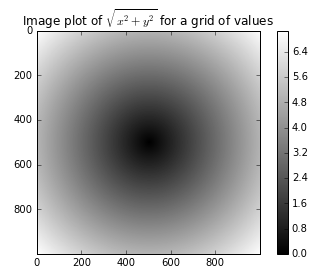

In [34]:
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
z
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar();
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values");
#plt.draw();

### Expressing conditional logic as array operations
#### 條件邏輯轉換陣列運算

In [35]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [36]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

In [37]:
result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [40]:
arr = randn(4, 4)
print(arr)
print(np.where(arr > 0, 2, -2))
np.where(arr > 0, 2, arr) # set only positive values to 2

[[-1.2597 -1.3456 -0.3739 -0.263 ]
 [ 0.343  -0.388  -0.3307 -0.0504]
 [ 0.8892  2.5713 -1.9157 -0.6877]
 [-2.3444  1.0592  1.2689 -1.569 ]]
[[-2 -2 -2 -2]
 [ 2 -2 -2 -2]
 [ 2  2 -2 -2]
 [-2  2  2 -2]]


array([[-1.2597, -1.3456, -0.3739, -0.263 ],
       [ 2.    , -0.388 , -0.3307, -0.0504],
       [ 2.    ,  2.    , -1.9157, -0.6877],
       [-2.3444,  2.    ,  2.    , -1.569 ]])

In [49]:
cond1 = np.random.randn(10)
cond2 = np.random.randn(10)
cond1 = cond1 > 0
cond2 = cond2 > 0
print(cond1)
print(cond2)

result = []
for i in range(10):
    if cond1[i] and cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)

print(result)

[False  True False  True  True False  True False False False]
[ True  True False  True False False False  True False False]
[2, 0, 3, 0, 1, 3, 1, 2, 3, 3]


In [50]:
np.where(cond1 & cond2, 0,
         np.where(cond1, 1,
                  np.where(cond2, 2, 3)))

array([2, 0, 3, 0, 1, 3, 1, 2, 3, 3])

In [53]:
result = 1 * cond1 + 2 * cond2 + 3 * ~(cond1 | cond2)
result

array([2, 3, 3, 3, 1, 3, 1, 2, 3, 3])

### Mathematical and statistical methods
#### 數學與統計方法

In [60]:
arr = np.random.randn(5, 4) # normally-distributed data
print(arr)
print(arr.mean())
print(np.mean(arr)) #同上
arr.sum()

[[-0.4785  1.0326 -1.0779 -1.1475]
 [ 0.5473  1.4914 -0.8003  0.954 ]
 [-2.0211  0.2107  1.6607  0.0216]
 [-0.2212  0.7865  0.5663  0.9596]
 [-1.1538  1.1174  0.0082 -0.1987]]
0.112860545729
0.112860545729


2.257210914586528

In [62]:
#可針對特定維度做計算
print(arr.mean(axis=1))
arr.sum(0)

[-0.4178  0.5481 -0.0321  0.5228 -0.0567]


array([-3.3274,  4.6385,  0.357 ,  0.5891])

In [69]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(arr)
#產生sum計算中間過程
print(arr.cumsum(0))

#產生相乘計算中間過程
arr.cumprod(1)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]


array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

In [65]:
#太陽日計算
arr = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
print(arr.cumsum(0))

[ 31  59  90 120 151 181 212 243 273 304 334 365]


|Method|說明|
|--|--|
|sum|加總，可指定軸，0長度計算為0|
|mean|平均，可指定為軸，0長度計算為NaN|
|std, var|標準差與方差，可指定自由度，預設為n|
|min, max|最大與最小|
|argmin, argmax|最大與最小的索引值|
|cumsum|累加值|
|cumprod|壘乘值|

### Methods for boolean arrays
#### bool陣列的操作

In [90]:
arr = randn(1000)
(arr > 0).sum() # T為1，F為0

501

In [91]:
bools = np.array([False, False, True, False])
print(bools.any()) #只要有一個是True就是True
bools.all()        #檢查全部是不是True

True


False

### Sorting
#### 排序

In [92]:
arr = randn(8)
print(arr)
arr.sort()
print(arr)

[-0.3344 -1.1722 -1.0108 -1.0053 -1.0675  0.102   1.1774 -0.3305]
[-1.1722 -1.0675 -1.0108 -1.0053 -0.3344 -0.3305  0.102   1.1774]


In [93]:
arr = randn(5, 3)
print(arr)
arr.sort(1)
print(arr)

[[ 1.3681 -1.2233 -0.0952]
 [ 1.2266 -1.0473  0.7249]
 [-0.4707  0.9056  0.0652]
 [-1.0605  0.5116  1.3613]
 [ 0.1774 -0.1725  0.3521]]
[[-1.2233 -0.0952  1.3681]
 [-1.0473  0.7249  1.2266]
 [-0.4707  0.0652  0.9056]
 [-1.0605  0.5116  1.3613]
 [-0.1725  0.1774  0.3521]]


In [96]:
large_arr = randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile，取得資料前5%的值為多少

-1.7618623062599419

In [103]:
large_arr = randn(6)

print(np.sort(large_arr)) #回傳副本
print(large_arr) #原始數據

large_arr.sort() #原始數據會改變
print(large_arr)

[-1.3514 -1.0628 -0.0733  0.4117  1.1286  1.4744]
[-0.0733 -1.3514  1.4744  1.1286  0.4117 -1.0628]
[-1.3514 -1.0628 -0.0733  0.4117  1.1286  1.4744]


### Unique and other set logic
#### 唯一化以及其他集合邏輯

In [104]:
#找出陣列中的不重複值，並且排序
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

['Bob' 'Joe' 'Will']


array([1, 2, 3, 4])

In [106]:
#上面同等原生語法此用法
sorted(set(names))

['Bob', 'Joe', 'Will']

In [109]:
#檢查是否在另一個陣列中，回傳bool陣列
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

|Method|Description|
|--|--|
|unique(x)|排除重複值，並排序|
|intersect1d(x, y)|計算兩者交集，並排序|
|union1d(x, y)|計算兩者聯集，並排序|
|in1d(x, y)|檢查x中的元素是否在y之中|
|setdiff1d(x, y)|移除x中y的元素|
|setxor1d(x, y)|聯集扣除交集(對稱差)|

## File input and output with arrays
### 陣列的輸出與輸入

### Storing arrays on disk in binary format
#### 儲存成二進位格式

In [126]:
arr = np.arange(10)
np.save('ch04/some_array', arr) #副檔名預設成npy

In [127]:
np.load('ch04/some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [128]:
#可將數個陣列壓縮儲存
np.savez('ch04/array_archive.npz', a=arr, b=arr)

In [131]:
#取出時採用類似字典的物件型態
arch = np.load('ch04/array_archive.npz')
arch['b']
del arch

In [132]:
!rm some_array.npy
!rm array_archive.npz

!del ch04\some_array.npy
!del ch04\array_archive.npz

'rm' 不是內部或外部命令、可執行的程式或批次檔。
'rm' 不是內部或外部命令、可執行的程式或批次檔。
找不到 D:\練習用\Python-for-Data-Analysis\ch04\some_array.npy


### Saving and loading text files
#### 存取一般文檔

In [3]:
arr = np.loadtxt('ch04/array_ex.txt', delimiter=',')
arr

array([[ 0.5801,  0.1867,  1.0407,  1.1344],
       [ 0.1942, -0.6369, -0.9387,  0.1241],
       [-0.1264,  0.2686, -0.6957,  0.0474],
       [-1.4844,  0.0042, -0.7442,  0.0055],
       [ 2.3029,  0.2001,  1.6702, -1.8811],
       [-0.1932,  1.0472,  0.4828,  0.9603]])

## Linear algebra
### 線性代數

In [4]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x)
print(y)
x.dot(y)  # equivalently np.dot(x, y)

[[ 1.  2.  3.]
 [ 4.  5.  6.]]
[[  6.  23.]
 [ -1.   7.]
 [  8.   9.]]


array([[  28.,   64.],
       [  67.,  181.]])

In [7]:
np.dot(x, np.ones(3))

array([  6.,  15.])

In [8]:
np.random.seed(12345)

In [17]:
from numpy.linalg import inv, qr
X = randn(5, 5)
mat = X.T.dot(X)
print('原始矩陣')
print(mat)

print('計算反矩陣')
print(inv(mat))
print('自己與自己反矩陣相成，變成單元矩陣')
print(mat.dot(inv(mat)))

#QR分解，A = Q * R
q, r = qr(mat)
print('上三角矩陣')
print(r)
print('把分解的乘回去')
q.dot(r)

原始矩陣
[[ 6.3193  1.0093  1.0467  4.3965 -2.0501]
 [ 1.0093  8.624  -1.0335  1.1477  1.4415]
 [ 1.0467 -1.0335  1.6516  1.8409 -1.0298]
 [ 4.3965  1.1477  1.8409  7.3617 -0.8578]
 [-2.0501  1.4415 -1.0298 -0.8578  1.8581]]
計算反矩陣
[[ 0.7    -0.1214  0.571  -0.427   0.9858]
 [-0.1214  0.1725  0.0108  0.0131 -0.2557]
 [ 0.571   0.0108  1.7753 -0.6337  1.313 ]
 [-0.427   0.0131 -0.6337  0.4759 -0.6129]
 [ 0.9858 -0.2557  1.313  -0.6129  2.269 ]]
自己與自己反矩陣相成，變成單元矩陣
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [-0.  0.  1.  0.  0.]
 [-0.  0.  0.  1.  0.]
 [ 0. -0.  0. -0.  1.]]
上三角矩陣
[[-8.0981 -1.9871 -2.1616 -8.0256  2.4893]
 [ 0.     -8.7124  1.5185 -0.4245 -2.0737]
 [ 0.      0.     -1.537  -2.7248  0.1946]
 [ 0.      0.      0.     -2.6365 -0.9351]
 [ 0.      0.      0.      0.      0.3474]]
把分解的乘回去


array([[ 6.3193,  1.0093,  1.0467,  4.3965, -2.0501],
       [ 1.0093,  8.624 , -1.0335,  1.1477,  1.4415],
       [ 1.0467, -1.0335,  1.6516,  1.8409, -1.0298],
       [ 4.3965,  1.1477,  1.8409,  7.3617, -0.8578],
       [-2.0501,  1.4415, -1.0298, -0.8578,  1.8581]])

|Function|Description|
|--|--|
|diag|回傳一個方陣的對角線元素，或把一組一維陣列轉換成方陣|
|dot|矩陣乘法|
|trace|對角線元素和|
|det|矩陣行列式|
|eig|eigenvalues 與 eigenvectors|
|inv|方陣的反矩陣|
|pinv|Moore-Penrose偽反矩陣(補乘一個轉置矩陣)|
|qr|QR分解|
|svd|singular value decomposition (SVD)奇異解|
|solve|Ax = b for x|
|lstsq|y = Xb，最小二乘法|

## Random number generation
### 亂數產生器

In [18]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 1.0229,  1.1074,  0.0909, -0.3501],
       [ 0.218 , -0.8948, -1.7415, -1.0523],
       [ 1.4366, -0.5762, -2.4203, -1.0623],
       [ 0.2374,  0.001 ,  0.0653, -1.3675]])

In [20]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

1 loop, best of 3: 1.31 s per loop
10 loops, best of 3: 36.8 ms per loop


## Example: Random Walks

In [ ]:
np.random.seed(12345)

In [ ]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [ ]:
walk.min()
walk.max()

In [ ]:
(np.abs(walk) >= 10).argmax()

### Simulating many random walks at once

In [ ]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

In [ ]:
walks.max()
walks.min()

In [ ]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

In [ ]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

In [ ]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))